# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")


# Display the data table for preview

combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [184]:
# Checking the number of mice.

mice_number = combined_data ["Mouse ID"].nunique()
mice_number


249

In [185]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [186]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice_id), :]

duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [187]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_id)==False]
cleaned_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [188]:
# Checking the number of mice in the clean DataFrame.

mice_cleaned = cleaned_mice ["Mouse ID"].nunique()
mice_cleaned


248

## Summary Statistics

In [189]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_mice["Tumor Volume (mm3)"].groupby(cleaned_mice["Drug Regimen"]).mean()
median = cleaned_mice["Tumor Volume (mm3)"].groupby(cleaned_mice["Drug Regimen"]).median()
variance = cleaned_mice["Tumor Volume (mm3)"].groupby(cleaned_mice["Drug Regimen"]).var()
std = cleaned_mice["Tumor Volume (mm3)"].groupby(cleaned_mice["Drug Regimen"]).std()
SEM = cleaned_mice["Tumor Volume (mm3)"].groupby(cleaned_mice["Drug Regimen"]).sem()


summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,"Tumor Volume Variance":variance,"Tumor Volume Std. Dev":std,"Tumor Volume Std. Err.":SEM})

summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [190]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

aggregation_summary = cleaned_mice.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [191]:
count_of_mice = cleaned_mice["Drug Regimen"].value_counts()
count_of_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, ' # Mice per Treatment')

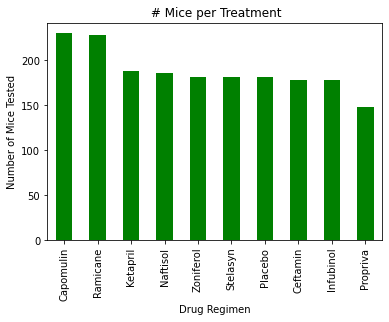

In [192]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = count_of_mice.plot.bar(color = 'g')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title(" # Mice per Treatment")

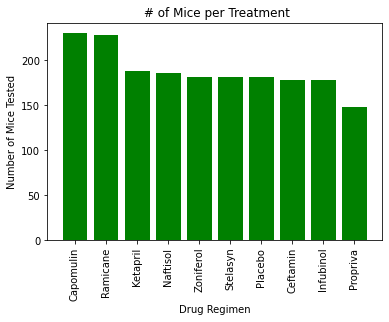

In [193]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(count_of_mice.index, count_of_mice.values, color = "g")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title(" # of Mice per Treatment")
plt.xticks(rotation = 90)
plt.show()


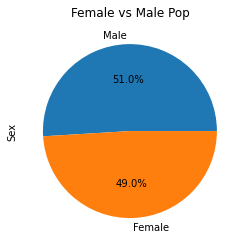

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender_pie = cleaned_mice["Sex"].value_counts()
plt.title("Female vs Male Pop")
gender_pie.plot.pie(autopct = "%1.1f%%")

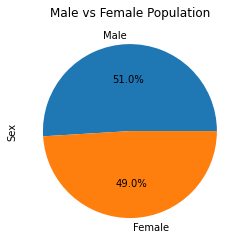

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51, 49]
pie = gender_pie.plot.pie(y= "Total Count", autopct = "%1.1f%%")
plt.title("Male vs Female Population")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

timepoint_last = cleaned_mice.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_last

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_last_df = pd.merge(timepoint_last, cleaned_mice, on = (["Mouse ID", "Timepoint"]))
timepoint_last_df.head()





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [219]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_Volume_Data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    regimen = timepoint_last_df.loc[timepoint_last_df["Drug Regimen"] == treatment]
    tumor_volumes = regimen["Tumor Volume (mm3)"]
    Tumor_Volume_Data.append(tumor_volumes)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = Tumor_Volume_Data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0



quartile1 = Tumor_Volume_Data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1



quartile2 = Tumor_Volume_Data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2



quartile3 = Tumor_Volume_Data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)



    # add subset 
    
    
    # Determine outliers using upper and lower bounds
print(f"For the drug: {treatments[0]}, {lower_bound0} and {upper_bound0} are potential outliers")
print(f"For the drug: {treatments[1]}, {lower_bound1} and {upper_bound1} are potential outliers")
print(f"For the drug: {treatments[2]}, {lower_bound2} and {upper_bound2} are potential outliers")
print(f"For the drug: {treatments[3]}, {lower_bound3} and {upper_bound3} are potential outliers")




For the drug: Capomulin, 20.70456164999999 and 51.83201549 are potential outliers
For the drug: Ramicane, 17.912664470000003 and 54.30681135 are potential outliers
For the drug: Infubinol, 36.83290494999999 and 82.74144559000001 are potential outliers
For the drug: Ceftamin, 25.355449580000002 and 87.66645829999999 are potential outliers


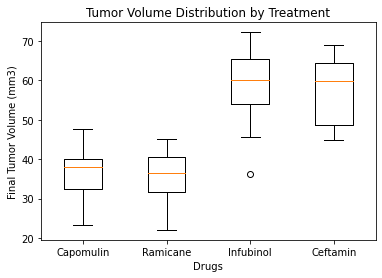

In [221]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

ax.boxplot(Tumor_Volume_Data, labels=treatments)

ax.set_title("Tumor Volume Distribution by Treatment")
ax.set_xlabel("Drugs")
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

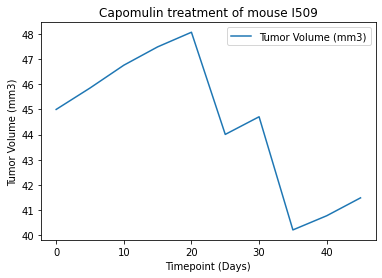

In [239]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#capomulin_treated = cleaned_mice[cleaned_mice["Drug Regimen"] == "Capomulin"]
#mouse_ids = capomulin_treated["Mouse ID"].unique()

#print(mouse_ids)

mouse_l509_df = cleaned_mice[cleaned_mice["Mouse ID"] == "l509"]
#print(mouse_l509_df)
mouse_l509_df.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)" )
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


Index(['Mouse ID', 'Age_months', 'Weight (g)', 'Timepoint',
       'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

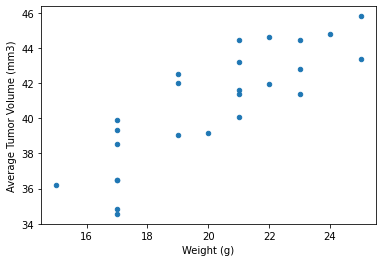

In [261]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume =cleaned_mice[cleaned_mice["Drug Regimen"] == "Capomulin"]
average_tumor_volume = average_tumor_volume.groupby(["Mouse ID"], as_index = False).mean()

print(average_tumor_volume.keys())

average_tumor_volume.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)" )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")





## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84 


Text(0, 0.5, 'Average Tumor Volume (mm3)')

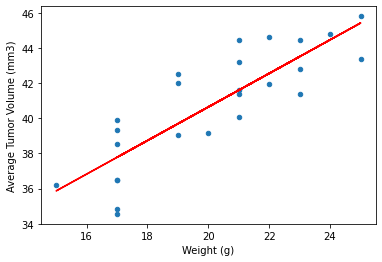

In [272]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = average_tumor_volume["Tumor Volume (mm3)"].corr(average_tumor_volume["Weight (g)"])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation,2)} ")
average_tumor_volume.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)" )
m, b = np.polyfit(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], 1)
plt.plot(average_tumor_volume["Weight (g)"], m * average_tumor_volume["Weight (g)"] + b, "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
